<a href="https://colab.research.google.com/github/Eddy265/DATA-ANALYTICS-REDI-INTERMEDIATE-/blob/main/Copy_of_EDA_%26_Plotting_Project_Cars_group_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - EDA on Berlin Rentals

## Let's remember cars dataset:
The dataset contains the information of 10.000 cars. There are 9 different columns:
- Make (Car brand, example: Ford)
- Model (The Model of the Car, example: Focus)
- Year (The Year in which the car was build, example: 2012)
- Variant (The car model version showing the PS, example: 1.6 Trendline)
- Kms (The kilometers the cars has been driven, example: 90000)
- Price (The offered price for the car, example: 10000)
- Doors (How many doors the car has, example: 4)
- Kind (Type of car, example: Pick-Up)
- Location (Where the car is located, example: Buenos Aires)

--- 
## The Task:

You want to find why some cars are more expensive than others. For this we will explore the different variables. 
1. Have a look at the variables and formulate for every variable a hypothesis, how the variable affects the price of the flat.
2. Create an analysis for every hypothesis. Show your conclusion with a plot. 
3. Write a short conclusion to every hypothesis test.

Some hints:
- Look at correlation plots and try to find patterns that explain the price of a car
- Try to use the hue variable to compare different categorical variables (e.g. condition)
- BONUS Try to create your own variables to extract one effect and seek to explain it

In [83]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading data
df = pd.read_csv("https://raw.githubusercontent.com/juliandnl/redi_ss20/master/cars.csv")

In [84]:
df.head()

,Make,Model,Year,Variant,Kms,Price,Doors,Kind,Location
0,Volkswagen,Vento,2012,2.5 Luxury 170cv,99950,360000,4.0,Sedán,Córdoba
1,Ford,Ranger,2012,2.3 Cd Xl Plus 4x2,140000,320000,2.0,Pick-Up,Entre Ríos
2,Volkswagen,Fox,2011,1.6 Trendline,132000,209980,5.0,Hatchback,Bs.as. G.b.a. Sur
3,Ford,Ranger,2017,3.2 Cd Xls Tdci 200cv Automática,13000,798000,4.0,Pick-Up,Neuquén
4,Volkswagen,Gol,2013,1.4 Power 83cv 3 p,107000,146000,3.0,Hatchback,Córdoba


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Make      10000 non-null  object 
 1   Model     10000 non-null  object 
 2   Year      10000 non-null  int64  
 3   Variant   10000 non-null  object 
 4   Kms       10000 non-null  int64  
 5   Price     10000 non-null  int64  
 6   Doors     10000 non-null  float64
 7   Kind      10000 non-null  object 
 8   Location  10000 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 703.2+ KB


# 1. Have a look at the variables and formulate for every variable a hypothesis, how the variable affects the price of the cars.


# Hypothesis
1. The more recent the Year of manufature, the higher the price of the car
2. Price of the car depends on the make
3. The Kind of car affects the price
4. The more the Kms, the lower the price of the car


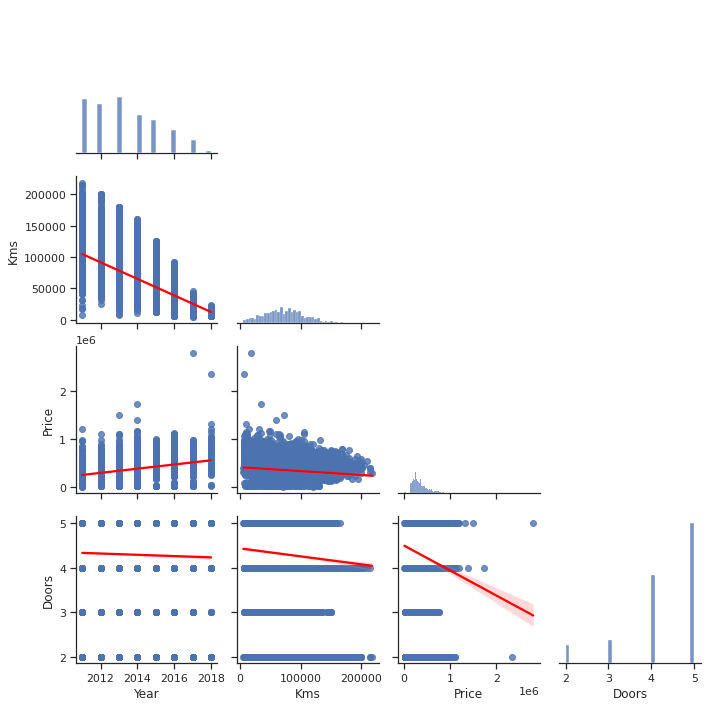

In [86]:
sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}}, corner=True)

In [87]:
rela = df.corr()
round(rela,2)

,Year,Kms,Price,Doors
Year,1.00,-0.68,0.45,-0.03
Kms,-0.68,1.00,-0.16,-0.07
Price,0.45,-0.16,1.00,-0.11
Doors,-0.03,-0.07,-0.11,1.00


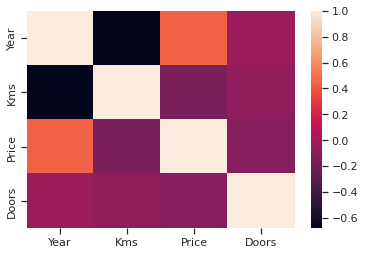

In [89]:
sns.heatmap(rela);

# 1 The more recent the Year of manufaturek, the higher the price of the car

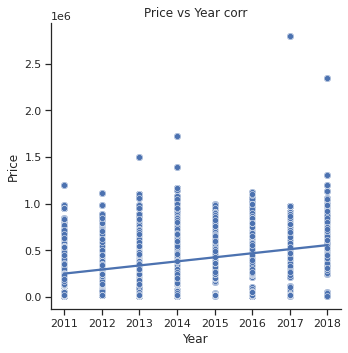

In [91]:
sns.lmplot(x="Year", y="Price", data=df);
ax = sns.scatterplot(x="Year", y="Price", data=df)
ax.set_title("Price vs Year corr")
ax.set_xlabel("Year");

In [92]:
from scipy import stats
stats.pearsonr(df['Price'], df['Year'])

(0.4472384700493309, 0.0)

- 1. Pearson’s r (0,44)

- 2. A p-value (0.0). This is the probability that the true value of r is zero (no correlation).

# Conclusion
There is a positive correlation (not a strong one) between the Price of cars and the Year manufactured. This is supported by the Pearson's (r) coefficient of 0.44 and the p value of 0.0. This confirms the hypothesis that more recent the manufacture year, the higher the price. 



# Create an analysis for every hypothesis. Show your conclusion with a plot. 

In [96]:
# dum=pd.get_dummies(df['Make'])

In [118]:
# fvalue, pvalue = stats.f_oneway(dum['Chrysler'], df['Price'])
# print(fvalue, pvalue)

#2 Price of the car depends on the make

Text(0.5, 1.0, 'Price vs Make')

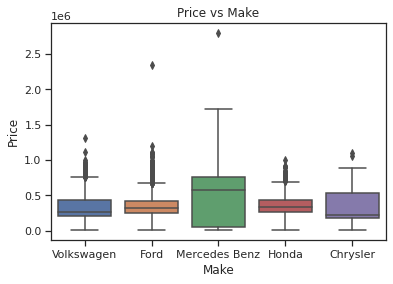

In [121]:
ax=sns.boxplot(x='Make', y='Price', data=df)
ax.set_title("Price vs Make")

# Conclusion
From here we can see that the prices differs according to the car make. however, more statistical analysis is needed to confirm statistically that this is infact the situation.  

# 3 The Kind of car affects the price

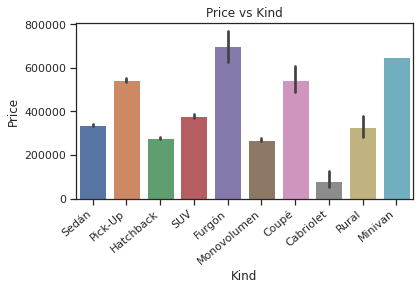

In [109]:
ax= sns.barplot(x='Kind', 
                y='Price', 
                #hue='Make', # Here the females and males will be plotted in different colors
                data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
ax.set_title("Price vs Kind")
plt.show()

# Conclusion
From here we can see that the prices differs according to the kind of car. 
The Furgon kind of car has a higher price than others. 
however, more statistical analysis is needed to confirm statistically that this is infact the situation.  

# 4 The more the Kms, the lower the price of the car

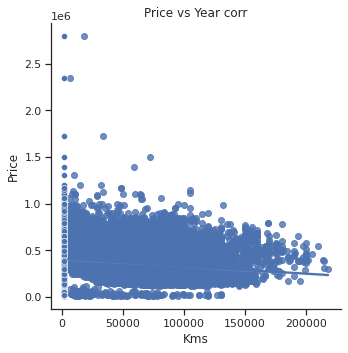

In [112]:
sns.lmplot(x="Kms", y="Price", data=df);
ax = sns.scatterplot(x="Year", y="Price", data=df)
ax.set_title("Price vs Year corr")
ax.set_xlabel("Kms");

# Conclusion
From here we can see that the higher the Kilometer of the car, the lesser the prices of the cars. 
however, more statistical analysis is needed to confirm statistically that this is infact the situation.  

In [116]:
stats.pearsonr(df['Price'], df['Kms'])

(-0.15901819516308427, 1.2423919469337697e-57)

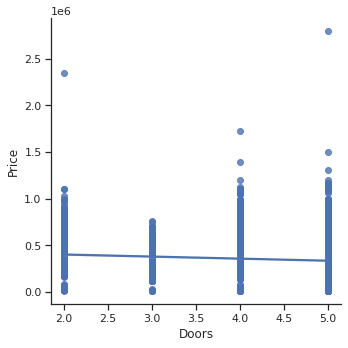

In [114]:
sns.lmplot(x='Doors', 
                y='Price', 
                data=df)

In [115]:
stats.pearsonr(df['Price'], df['Doors'])

(-0.11158821625792012, 4.442632042405689e-29)

# Conclusion
From here we can see that the more the number of doors of the cars, the lesser the prices of the cars. 
however, more statistical analysis is needed to confirm statistically that this is infact the situation.  